<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Привет, Анна!</b>

Меня зовут Вадим, и я буду проверять твой проект. Предлагаю общение на «ты», но если тебе комфортнее на «Вы», обязательно сообщи мне об этом. 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Тобой проделана большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии. Есть несколько правил:<br>
- <b>Пожалуйста, не перемещай, не изменяй и не удаляй комментарии.</b>
- У комментариев могут быть приписки <b>V2, V3</b> и т.д., которые соответствуют версии проверки. 
   
В тетрадке ты можешь встретить 3 вида моих комментариев:
    
<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Комментарии такого цвета необходимо исправить, без их отработки проект не будет принят.
</div>
    
    
<div class="alert alert-warning">
    <b>⚠️ Комментарий ревьюера:</b>
    
На комментарии такого цвета нужно обязательно обратить внимание. Рекомендую учесть их при редактировании проекта и выполнении будущих заданий.
</div>
    
    
<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах.
</div>
    
Предлагаю работать над проектом в диалоге: если ты хочешь ответить на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии вот так:

<div class="alert alert-info">
<b> Комментарий студента</b>

Тут текст.
</div>


Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
    <b>Общий комментарий ревьюера:</b>
    
Спасибо за отработку моих комментариев, Анна! Проект на финишной прямой! Осталось только поправить график недельных трат и я смогу принять проект.
    
</div>

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Напиши, пожалуйста, заголовок проекта.
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Принято!
</div>


# Анализ бизнес-показателей. Проект.

### Описание проекта

Развлекательное приложение Procrastinate Pro+ закзазало маркетинговое исследование. Несмотря на огромные вложения в рекламу,
последние несколько месяцев компания терпит убытки. Задачаисследования — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

В ходе исследования нам предстоит изучить:
откуда приходят пользователи и какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов;
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Отличное введение!
</div>

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)

In [4]:
costs.sample()

,dt,Channel,costs
312,2019-09-10,MediaTornado,3.36


In [5]:
visits.sample()

,User Id,Region,Device,Channel,Session Start,Session End
289879,348322568003,Germany,PC,organic,2019-09-30 23:36:35,2019-10-01 00:46:58


In [6]:
orders.sample()

,User Id,Event Dt,Revenue
39517,240191662390,2019-10-24 18:57:11,4.99


In [7]:
for df in [visits, orders, costs]:
  print(df.duplicated().sum())

0
0
0


In [8]:
costs = costs.rename(columns={'Channel': 'channel'})
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue' })
visits = (visits.rename(columns={'User Id': 'user_id',
                                 'Region':'region', 
                                 'Device':'device', 
                                 'Channel':'channel', 
                                 'Session Start': 'session_start',
                                 'Session End': 'session_end' })) 

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Напиши, пожалуйста, краткий вывод после предобработки: какие данные получили, какие операции произвели, бы ли выявлены особенности в данных.
</div>

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


В вашем распоряжении три датасета. 
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, 
orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

В результате предобработки мы не обнаружили дубликатов ни в одном из датасетов
Были переименованы названия некоторым столбцов для придания единообразия
Мы также преобразовали значения колонок, указывающих на время в формат времени

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Принято!
</div>

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Фукция get_profiles

In [14]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчёта LTV и ROI get_ltv

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


#### Функция для расчета удержания get_retention

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчёта конверсии get_conversion

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для сглаживания фрейма filter_data

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для визуализации удержания plot_retention

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI

In [21]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Функции заданы, можно приступать к анализу.
</div>

In [22]:
events = None

In [23]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [24]:
allusers = get_profiles(visits, orders, events, costs)

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [25]:
allusers.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [26]:
print(f"Минимальная дата привлечения клиентов -  {allusers['dt'].min()} ")
print(f"Максимальная дата привлечения клиентов -  {allusers['dt'].max()} ")

Минимальная дата привлечения клиентов -  2019-05-01 
Максимальная дата привлечения клиентов -  2019-10-27 


<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Задание выполнено верно!
</div>

In [27]:
def create_table(df, parameter):
    df1 = (df.groupby(parameter)
             .agg({'user_id': 'nunique'})
             .reset_index()
             .rename(columns={'user_id': 'users_number'}))
    df1['total_users'] = df1['users_number'].sum()
    df1['share in %'] = df1['users_number']/df1['total_users']*100
    df1 = df1.sort_values(by = 'share in %', ascending = False)
    return df1

In [28]:
def create_table1(df, parameter):
    df2 = create_table(df, parameter)
    df3 = create_table(df.query('payer == True'), parameter)
    df4 = df3.merge(df2, on = parameter,  how='left' )
    df4['share_within_parameter'] = df4['users_number_x']/df4['users_number_y']*100
    df4.columns = ['параметр', 'платящих клиентов по параметру', 'всего платящих клиентов', 'доля среди платящих в %', 'посетителей по параметру', 'всего посетителей', 'доля в % среди всех посетителей', 'доля оплативших по параметру в %']
    df5 = df4[['параметр','доля в % среди всех посетителей']].sort_values(by = 'доля в % среди всех посетителей', ascending= False)
    df6 = df4[['параметр','доля среди платящих в %']].sort_values(by = 'доля среди платящих в %', ascending= False)
    df7 = df4[['параметр','доля оплативших по параметру в %']].sort_values(by = 'доля оплативших по параметру в %', ascending= False)
    return df4, df5, df6, df7

In [29]:
def share_bar(df1, df2, df3, parameter, xlab, title1, title2, title3):
    plt.figure(figsize=(15, 5))
    ax=plt.subplot(1, 3, 1)
    sns.barplot(data=df1, x=parameter, y='доля в % среди всех посетителей', color='blue')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
    plt.xlabel(xlab)
    plt.title(title1)
    ax = plt.subplot(1, 3, 2)
    sns.barplot(data=df2, x=parameter, y='доля среди платящих в %',  color='yellow')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
    plt.xlabel(xlab)
    plt.title(title2)
    ax = plt.subplot(1, 3, 3)
    sns.barplot(data=df3, x=parameter, y='доля оплативших по параметру в %', color='green')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
    plt.xlabel(xlab)
    plt.title(title3)
    plt.show()

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Шикарные функции! 👏
</div>

In [30]:
reg, reg_t, reg_p, reg_s = create_table1(allusers, 'region')
reg

,параметр,платящих клиентов по параметру,всего платящих клиентов,доля среди платящих в %,посетителей по параметру,всего посетителей,доля в % среди всех посетителей,доля оплативших по параметру в %
0,United States,6902,8881,77.716473,100002,150008,66.664445,6.901862
1,UK,700,8881,7.881995,17575,150008,11.716042,3.982930
2,France,663,8881,7.465376,17450,150008,11.632713,3.799427
3,Germany,616,8881,6.936156,14981,150008,9.986801,4.111875


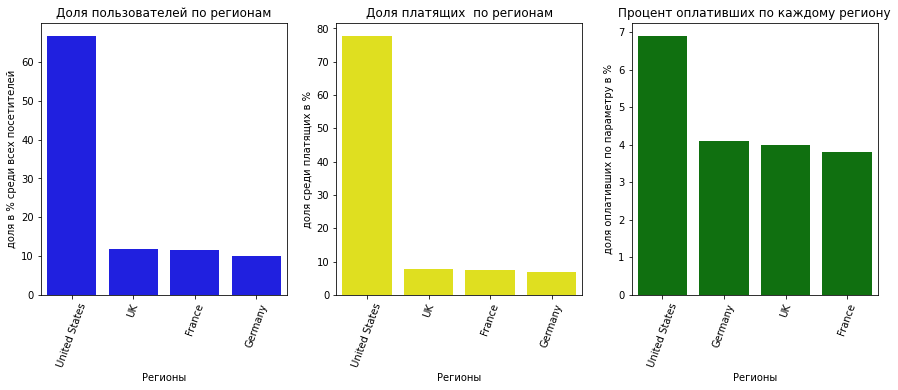

In [31]:
share_bar(reg_t, reg_p, reg_s, 'параметр', 'Регионы', 'Доля пользователей по регионам', 'Доля платящих  по регионам', 'Процент оплативших по каждому региону')

Мы видим, что примерно 67% всех пользователей приходят из США
При этом из всех платящих пользователей также больше всего клиентов из США. Доля США среди платящих пользователей - 78%. Мы также наблюдаем, что пользователи из США чаще становятся платящими клиентами. Так, практически 7% всех посетителей из США начинают пользоваться платными услугами. Для сравнения, посетители из Великобоитании, Франции и Герммании пользуются платными услугами  только в 4 % случаев 

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Отличный анализ!
</div>

In [32]:
dev, dev_t, dev_p, dev_s = create_table1(allusers, 'device')
dev

,параметр,платящих клиентов по параметру,всего платящих клиентов,доля среди платящих в %,посетителей по параметру,всего посетителей,доля в % среди всех посетителей,доля оплативших по параметру в %
0,iPhone,3382,8881,38.081297,54479,150008,36.317396,6.207897
1,Android,2050,8881,23.082986,35032,150008,23.353421,5.851793
2,Mac,1912,8881,21.529107,30042,150008,20.026932,6.364423
3,PC,1537,8881,17.306610,30455,150008,20.302251,5.046790


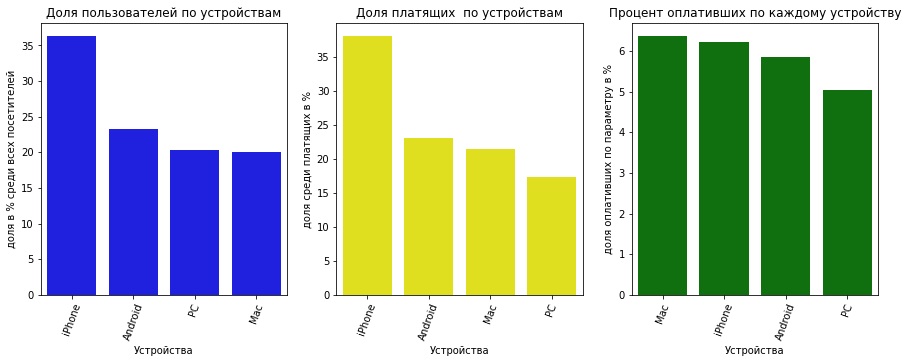

In [33]:
share_bar(dev_t, dev_p, dev_s, 'параметр', 'Устройства', 'Доля пользователей по устройствам', 'Доля платящих  по устройствам', 'Процент оплативших по каждому устройству')

Самые популярные устройства, как среди всех посетителей, так и среди платящих - это iPhone. Их доля составляет 36 % среди всех пользователей, и 38% среди платящих клиентов. 
Можно также наблюдать, что пользователи PC чаще, чем другие остаются на бесплатных тарифах

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Принято!
</div>

In [34]:
chan, chan_t, chan_p, chan_s = create_table1(allusers, 'channel')
chan

,параметр,платящих клиентов по параметру,всего платящих клиентов,доля среди платящих в %,посетителей по параметру,всего посетителей,доля в % среди всех посетителей,доля оплативших по параметру в %
0,FaceBoom,3557,8881,40.051796,29144,150008,19.428297,12.204914
1,TipTop,1878,8881,21.146267,19561,150008,13.039971,9.600736
2,organic,1160,8881,13.061592,56439,150008,37.623993,2.055316
3,WahooNetBanner,453,8881,5.100777,8553,150008,5.701696,5.296387
4,AdNonSense,440,8881,4.954397,3880,150008,2.586529,11.340206
5,RocketSuperAds,352,8881,3.963518,4448,150008,2.965175,7.913669
6,LeapBob,262,8881,2.950118,8553,150008,5.701696,3.063253
7,OppleCreativeMedia,233,8881,2.623578,8605,150008,5.736361,2.707728
8,lambdaMediaAds,225,8881,2.533498,2149,150008,1.432590,10.469986
9,YRabbit,165,8881,1.857899,4312,150008,2.874513,3.826531


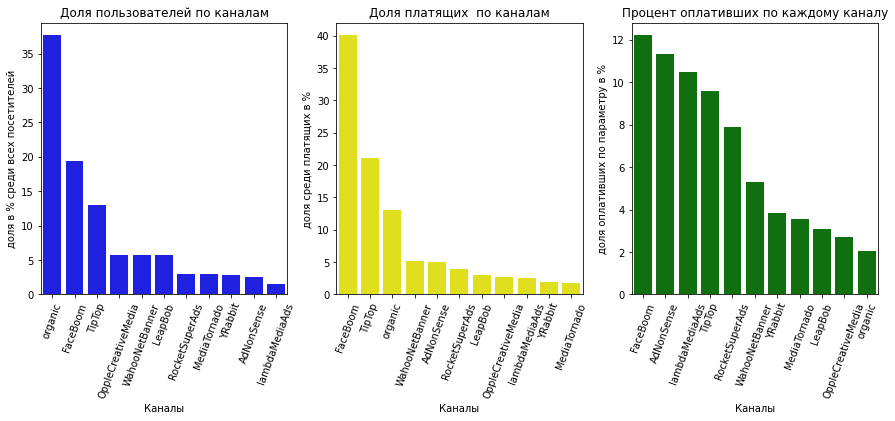

In [35]:
share_bar(chan_t, chan_p, chan_s,'параметр', 'Каналы', 'Доля пользователей по каналам', 'Доля платящих  по каналам', 'Процент оплативших по каждому каналу')
         

Больше всего посетителей приходят беспатно. Их доля примерно 38 % среди всех посетителей приложения. Однако, большинство таких клиентов не покупают платные услуги.
Каналы FaceBoom и TipTop привлекают больше всего как платных,так и бесплатных пользоваьелей приложения.
Стоит также обратить внимание на каналы AdNonSense	и lambdaMediaAds. Доля платных клиентов среди посетителей, пришедьших по этим каналам, составляет 11 % и 10 % сответственно.

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Все верно!
</div>

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [36]:
costs.sample()

,dt,channel,costs
284,2019-08-13,MediaTornado,5.52


In [37]:
print(f"Общие расходы на маркетинг составляют {costs['costs'].sum()} ")

Общие расходы на маркетинг составляют 105497.30000000002 


In [38]:
costs.groupby('channel').agg({'costs':'sum'}).reset_index().sort_values(by ='costs', ascending = False)

,channel,costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


По количеству потраченных средств с большим отрывом лидируют каналы TipTop и FaceBoom

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Принято!
</div>

Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [39]:
costs1 = costs
costs1['month'] = costs1['dt'].astype('datetime64[M]')
costs1['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
cost_chan = costs1.groupby(['month','week','channel']).agg({'costs':'sum'}).reset_index()
cost_chan1 = costs1.groupby(['week','channel']).agg({'costs':'sum'}).reset_index()
cost_chan1

,week,channel,costs
0,18,AdNonSense,211.05
1,18,FaceBoom,535.70
2,18,LeapBob,16.80
3,18,MediaTornado,38.64
4,18,OppleCreativeMedia,24.00
...,...,...,...
255,43,RocketSuperAds,50.70
256,43,TipTop,3265.50
257,43,WahooNetBanner,253.20
258,43,YRabbit,48.33


Text(0.5, 1.0, 'Расходы по каналам')

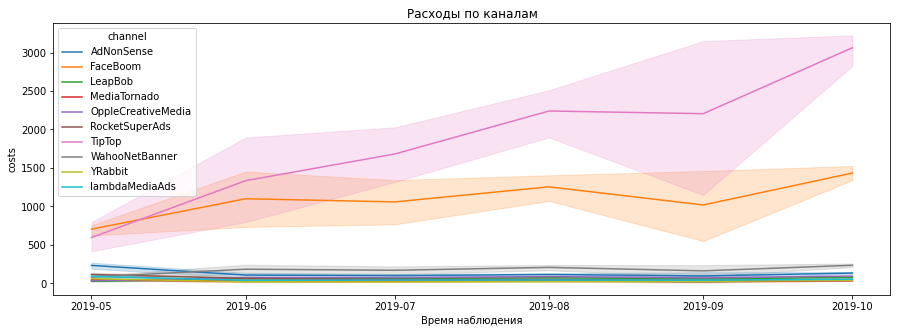

In [39]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=cost_chan, x='month', y='costs', hue='channel')
plt.xlabel('Время наблюдения')
plt.title('Расходы по каналам')

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Отличный график!
</div>

Text(0.5, 1.0, 'Расходы по каналам')

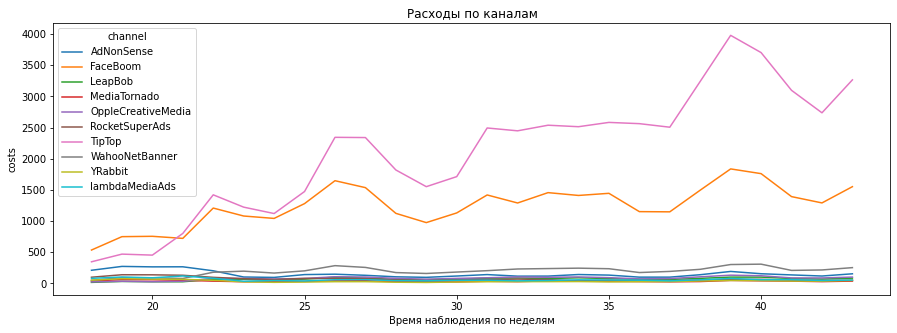

In [40]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=cost_chan1, x='week', y='costs', hue='channel')
plt.xlabel('Время наблюдения по неделям')
plt.title('Расходы по каналам')

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера V2:</b>
    
График построен не совсем верно. Сделай, пожалуйста, отдельную таблицу с недельными данными (без столбца с месяцами) и уже на основе нее нужно построй график. Сейчас данные агрегируются с месячным интервалом и видно что в начале каждого месяца происходит провал в показателях.
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V3:</b>

Теперь все верно!
</div>

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
По заданию также нужно построить график по недельным данным. Построй его, пожалуйста.
</div>

Большинство каналов расходуют примерно одинаковые бюджеты на всем промежутке наблюдения.
Начиная с середины мая мы видим резкий рост вложений в канал Tip Tip.
Канал FaceBoom на втором месте по расходам, однако расходы на этом канале не сильно менялись с июня по октябрь

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Вывод принят!
</div>

In [41]:
allusers.groupby('channel').agg({'acquisition_cost':'mean'}).reset_index().sort_values(by = 'acquisition_cost', ascending = False)

,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


Канал Tip-Top значительно более дорогой, по сравнению со всеми остальными. Стоимость привлечения клиента в 2,5 раза дороже, чем у канала FaceBoom.

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Анализ САС принят!
</div>

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

В данном разделе мы оцениваем эффективность рекламы, так что в дальнейшем мы будем анализировать данные без клиентов, поступивших из органического траффика

In [42]:
users = allusers.query('channel != "organic"')

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Предлагаю убрать органических пользователей из анализа. В данном блоке мы изучаем затраты на привлечение, а на привлечение органических пользователей мы не тратили ни цента. Данные пользователи будут только усреднять итоговую картину, сглаживая негативные показатели.
    
После удаления органических пользователей перепроверь, пожалуйста, все выводы, результаты некоторых графиков изменятся. По этой причине "зеленые" комментарии далее оставить пока не смогу.
    
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Спасибо!
</div>

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days
)

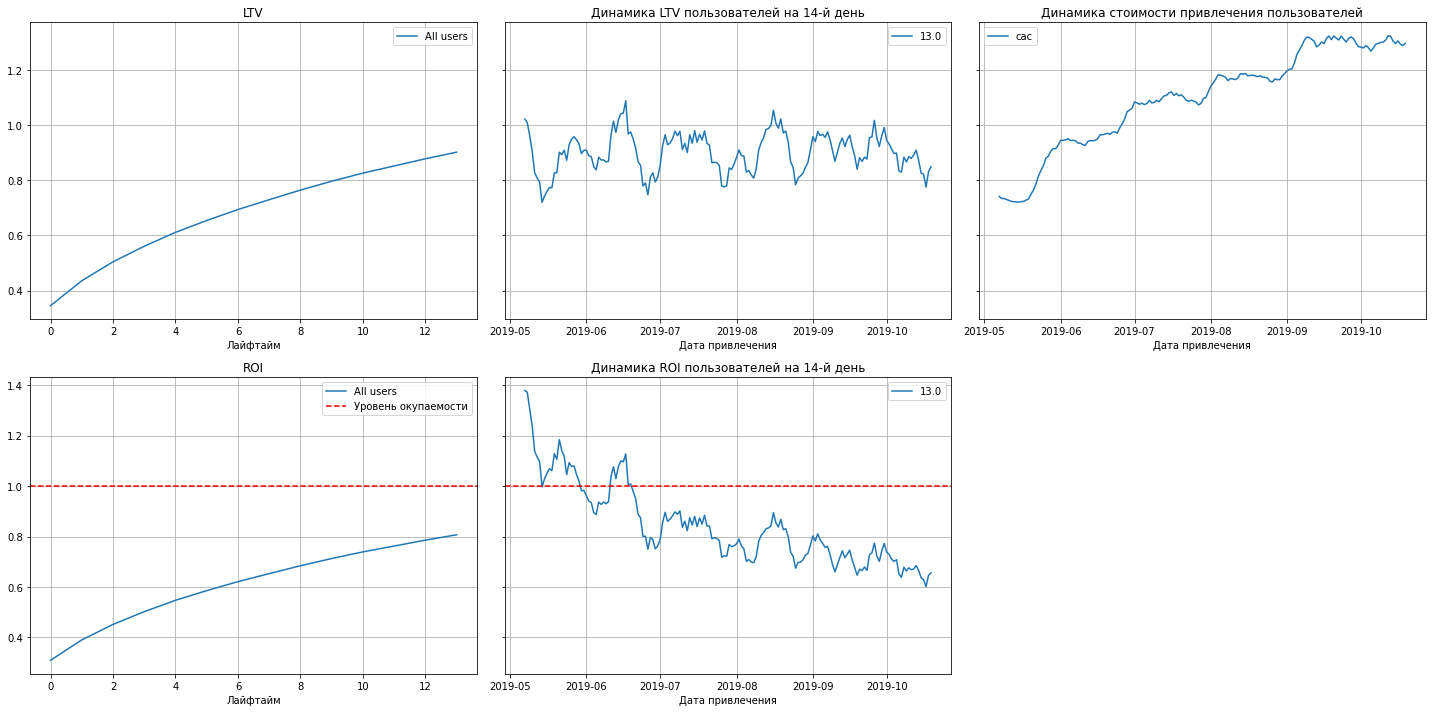

In [44]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:

1) LTV на протяжении первых двух недель растет. На графике динамики LTV мы видим, что средние показатели LTV оставались примерно одинаковыми на все временном промежутке с мая по октябрь

2) Мы видим бурный рост расходов на рекламу на всем периоде исследования. Компания по видимому начинает привлекать более дорогие способы привлечения клиентов, так как CAC непрерывно растет. При этом LTV остается неизменным.

3) Реклама не окупается в первые две недели. ROI приближается к уровню 0.8 к концу второй недели.

4) Можно заметить связь между графиком стоимости привлечения пользователей и графиком с  динамикой

5) ПО графику динамики ROI мы видим, что дела у компании идут все хуже и хуже. Если в мае прибыль все-таки превышала расходы, то к концу октября убытки стремительно увеличиваются.

Как мы видим, увеличение рекламного бюджета в мае - июне не приносит компании ожидаемой прибыли. Именно в соедствии проведения рекламной компании Procrastinate Pro начинает терпеть убытки

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Отличный вывод, но его нужно поправить после удаления органиков. Также здесь можно заметить что увеличение САС практически не повлияло на LTV.
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Принято!
</div>

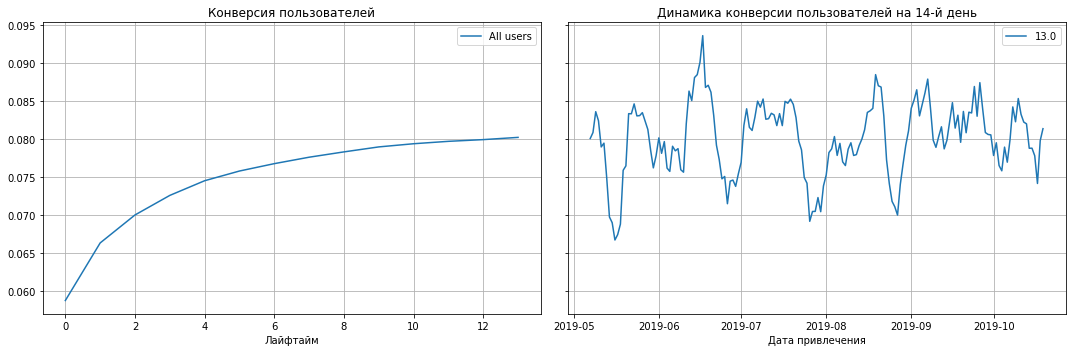

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Осовная конверсия происходит в первую неделю наблюдений. ПРи этом показтели конверсии не сильно изменились на всем периоде наблюдений с мая по октябрь

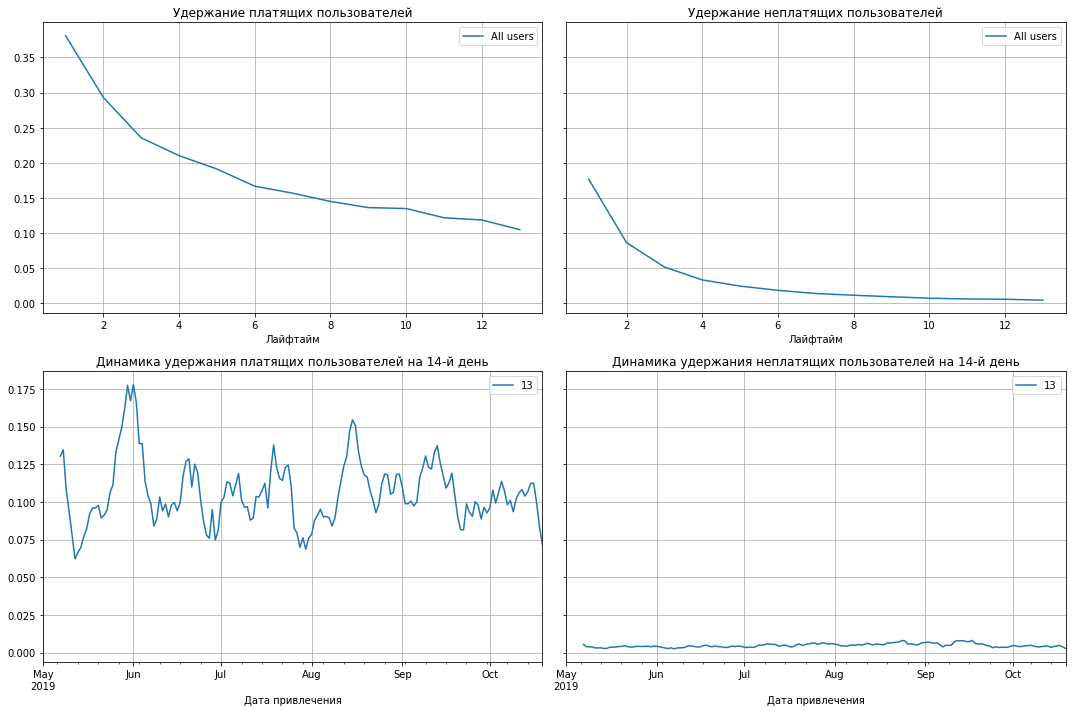

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    users, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Мы видим очень низкие показатели удержания клиентов. График немнго скачкообразный. Смая по июнь мы наблюдаем рост удержания, однако в дальнейшем показатели вернулись к среднему уровню 0.1 


<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Анализ удержания и конверсии принят!
</div>

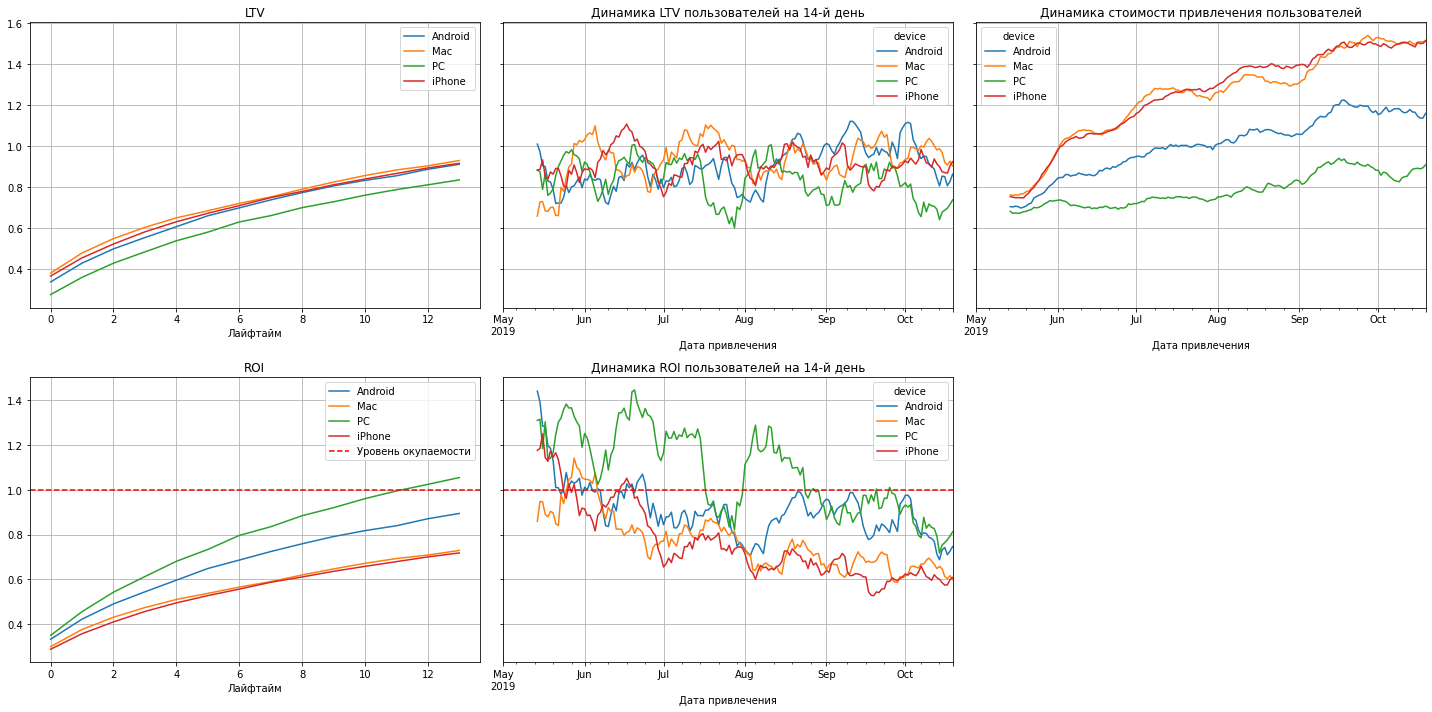

In [47]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На графики мы видим, что привлечение пользователей Iphone и Mac стоит дороже, чем пользователей других устройств.
1) CAC у пользователей Iphone и Mac выше, чем у пользователей других устройств. 
2) LTV у Iphone, Mac и Android немного выше, чем у пользователей PC
3) ПРи этом только пользователи PC выходят на уровень окупаемостик концу второй недели
4) Динамика ROI неутешительная. В мае пользователи всех устройств, кроме MAC к концу второй недели выходили выше уровня окупаемости, однако к октябрю все устройства 
При этом стоимость начинает резко растив середине мая

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Давай дополним вывод после графика: укажи, пожалуйста, какие устройста окупаются, а какие нет; если ли выбивающиеся значения на графике LTV (кто то лидирует или наоборот отстает?).
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Принято!
</div>

Чтобы разобраться в причинах финансовых трудностей компании, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

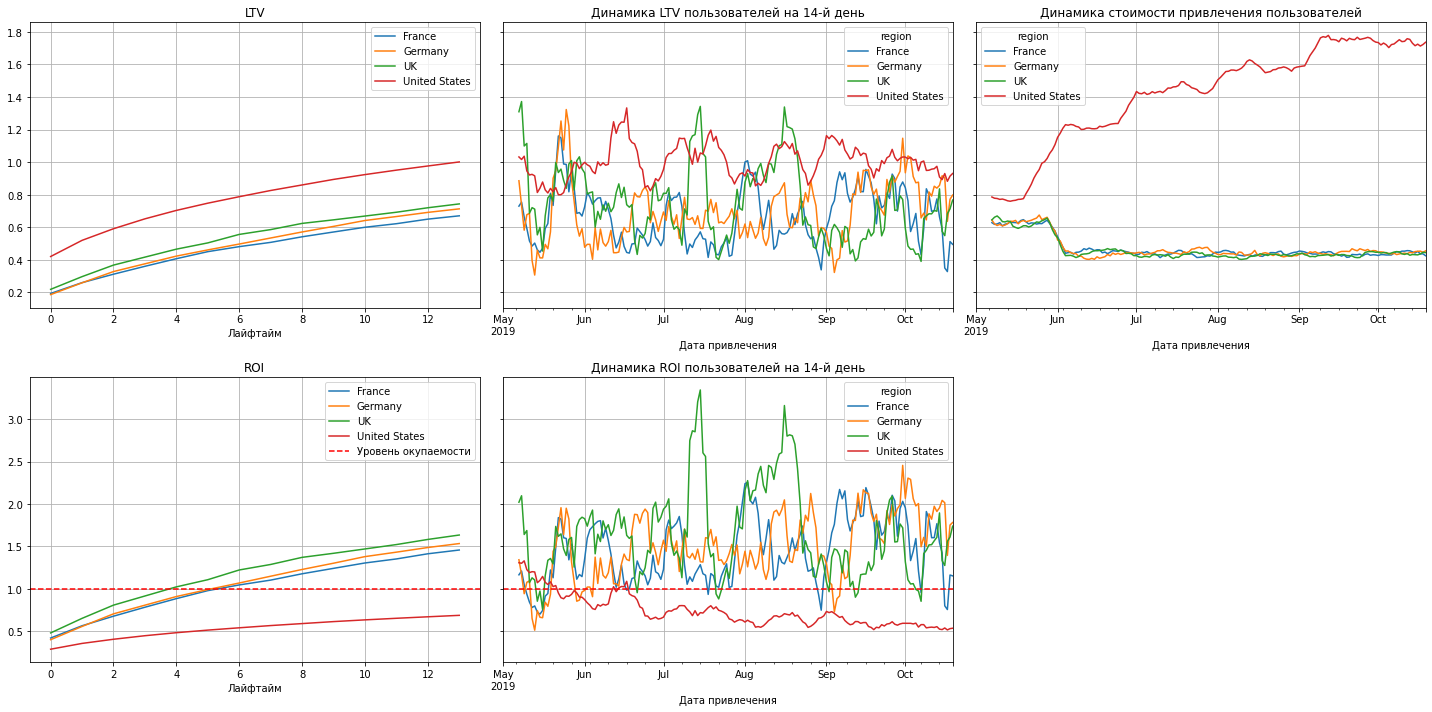

In [48]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
) 

По графикам мы видим, что рекламная компания, которая стартовала в середине мая и существенно увеличиа рекласный бюджет, была нацелена именно на пользователей из США. Пользователи из США действительно показывают хорошую конверсию и составляют более двух третей всех пользователей приложения. Мы также видим, что показатель LTV выше у американцев. Однако, показатели CAC именно у американцев демонстрируют непрерывный рост, в то время как на европейских рынках стоимость привлечения клиента значительно ниже.
За две недели американская аудитория не окупает вложения, показатель Roi очень низкий. Клиенты из других стран - Великобритании, Германии и Франции окупаются уже на 5-6 день пользования приложением.


<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Все верно, но давай опишем и результаты европейских стран.
</div>

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Нужен ли нам еще 1 точно такой же график? Давай оставим только 1 график LTV в разрезе стран.
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Теперь все верно!
</div>

Сделаем срез нашего датафрейма, в который войдут только клиенты из США

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
ОТличная идея, но давай сначала построим график по каналам из всех стран, а затем по каналам из США. Важно видеть и результаты Европы.
</div>

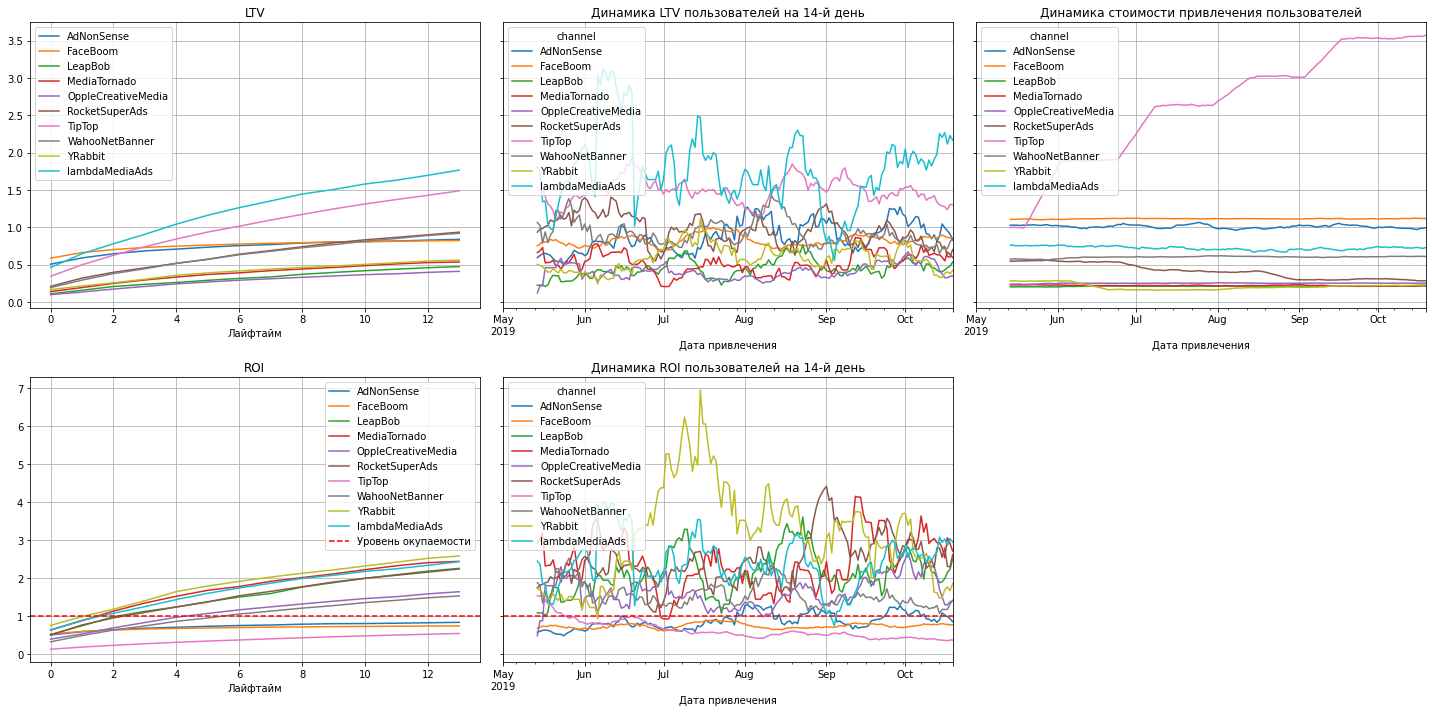

In [49]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикамс разбиением на каналы продвижения мы можем сделать следующие выводы:
1) Самые высокие показтели LTV у каналов TipTop и AdNonSense. Эти показатели остаются самыми высокими на всем периоде наблюдения с мая по октябрь
2) ПРи этом у канала Tip Top, начиная с середины мая, начинает стремительно расти CAC. Посмотрим, окупятся ли такие дорогие клиенты?
3) По графику ROI мы видим, что клиенты с каналов  FaceBoom, TipTop и AdNonSense так и не преодолевают порог самоокупаемости по истечению двух недель. Рост LTV у клиентов, пришедьших с TipTop немного компенсирует неудачи, мы не видим динамики падения roi на графике с динамикой ROI. Однако на всем периоде наблюдения порог окупаемости не был преодлен.

Больше всего прибыли приносят компании клиенты с каналов YRabbit (особенно бурный рост был в июле), MediaTornado и LambdaMediaAds. MediaTotando особенно выигрышно смотрится в последние два месяца наблюдений.

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Давай напишем более детальный вывод и проанализируем все графики (LTV, CAC, ROI), укажем названия не окупающихся каналов.
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Отличный вывод!
</div>

Нам важно изучить более детально проблемы с удержанием клиентов

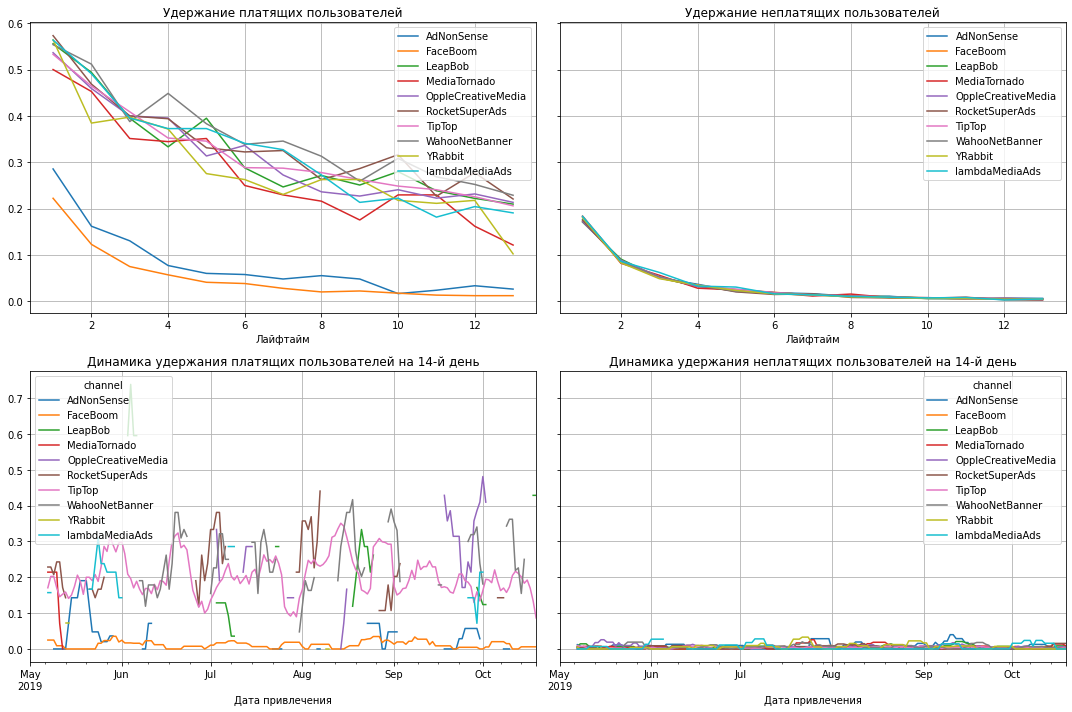

In [50]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    users, visits, observation_date, 14, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, 14) 

Мы видим, что у клиентов, пришедьших по двум рекламным источникам ('FaceBoom', и 'AdNonSense') очень серьезные проблемы с удержанием. Вероятно, клиенты испытывают разочарование, не получив набор услуг, обещанных в рекламе. Мы уже ранее предлагали не использовать  оба источника для привлечения клиентов. 

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Отличный вывод! Согласен с тобой!
</div>

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Мы ведь уже строили такой график. Давай оставим только 1 график по устройствам. Нет никакой необходимости иметь 2 одинаковых графика.
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Принято!
</div>

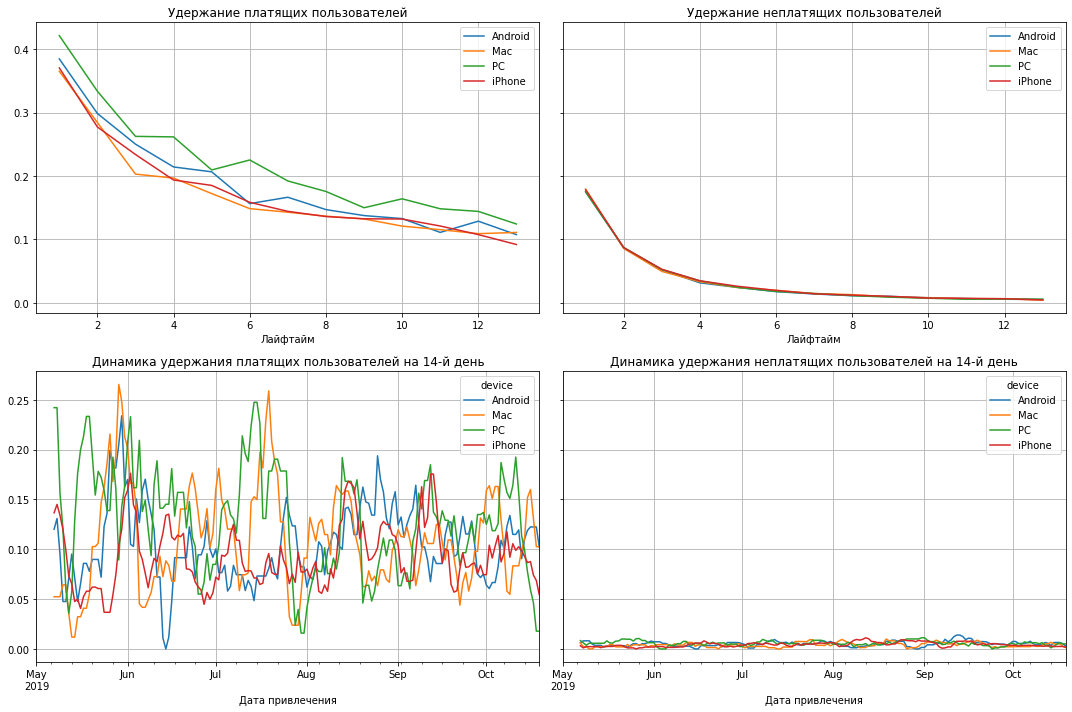

In [51]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    users, visits, observation_date, 14, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, 14) 

Мы не видим существенных различий в удержании пользователей разных устройств. Вероятно, приложение работает примерно одинаково на всех устройствах.

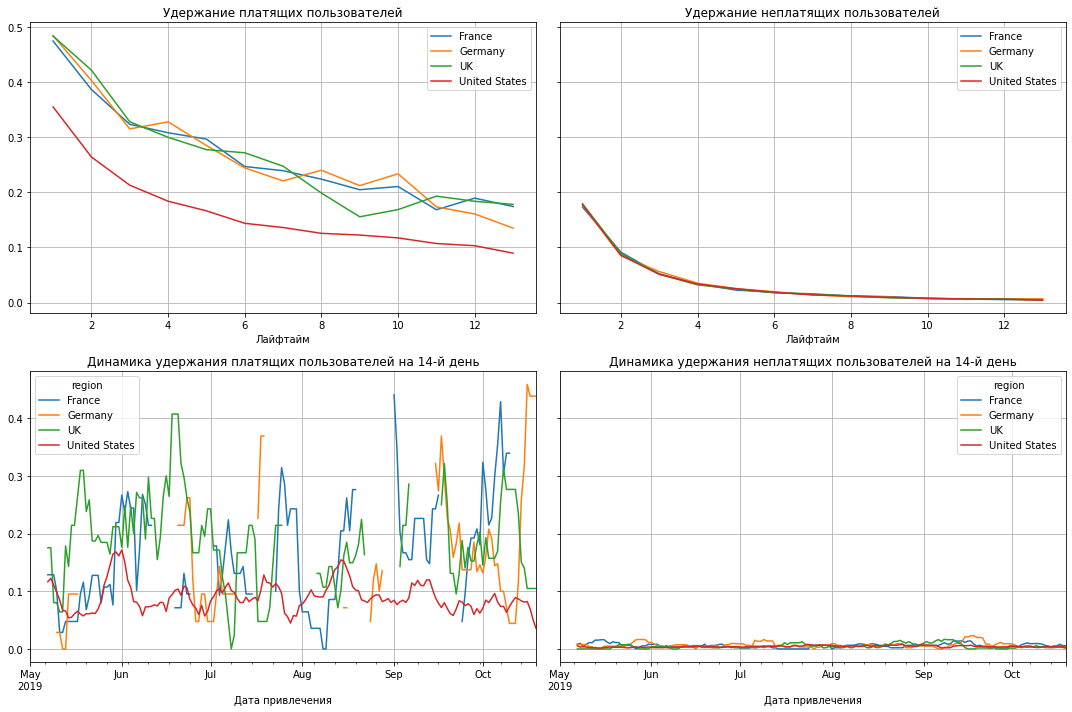

In [52]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    users, visits, observation_date, 14, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, 14) 

Клиенты из США удерживаются хуже остальных. Одна из возможных причин - несовпадение ожиданий, сформировавшихся от рекламы и действительности.

Попробуем исключить три убыточных канала - FaceBoom, TipTop и AdNonSense. Посмотрим, как будет чувствовать себя бизнес компании, используя другие каналы продвижения

In [53]:
chanl = ['FaceBoom', 'TipTop', 'AdNonSense']
users_c1 = users.query('channel not in @chanl')

In [54]:
print(f" Всего клиентов у компании {len(users['user_id'].unique())} ")
print(f" Клиентов, которые не пришли по убыточным каналам {len(users_c1['user_id'].unique())} ")

 Всего клиентов у компании 93569 
 Клиентов, которые не пришли по убыточным каналам 40984 


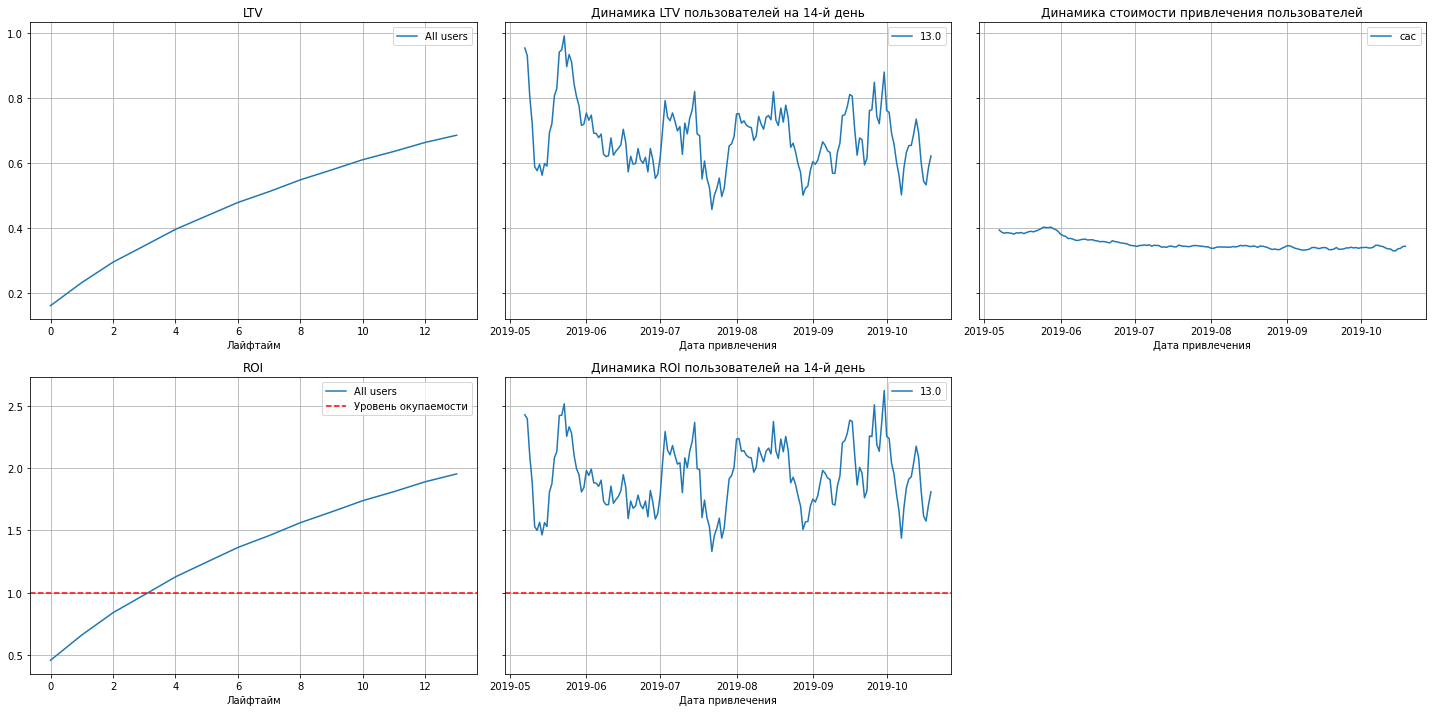

In [55]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users_c1, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Мы исключили три рекламных канала, которые приносили компании больше клиентов, но которые расходовали слишком много рекламного бюджета. В результате количество клиентов уменьшилось на треть, но бизнес в целом чувствует себя прекрасно! Показатель CAC перестал расти, а клиенты окупаются уже на чесвертый день пользования сервисом

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В результате маркетингового исследования мы зафиксировали значительный рост рекламного бюджета, начиная с мая 2019 года. Однако графики возврата инвестиций показывают, что вложения в рекламу не окупились.

Клиенты, пришедшие по платной рекламе, показали очень хорошие показатели по конверсии. Однако, мы наблюдаем бурный рост CAC на всем периоде наблюдения. По-видимому, рекоамные каналы тратят все больше средств на привлечение клентов, а клиенты не окупают расходов.

Мы также видим, что мобильному приложению труднее развиваться на американском рынке. Стоимость привлечения клиентов слишком высока, чтобы бизнес окупался. Однако большая часть клиентов приложения - американцы. Мы наблюдаем очень хорошие показатели конверсии, и при этом очень низкие показатели удержания. Мы не заметили явных проблем у пользователей тех или иных устройств, следовательно, проблемы с удержанием американцев следует искать в другой плоскости. 

Мы рекомендуем компании исключить три канала продвижения - "FaceBoom", "TipTop" и "AdNonSense". Эти каналы расходуют неоправданно большие средства, которые не окупаются приходящими клиентами. Мы видим, что у клиентов, привлеченных с помощью двух рекламных источников ("FaceBoom" и "AdNonSense"), возникают серьезные проблемы с удержанием. Вероятно, клиенты испытывают разочарование, не получив набор услуг, обещанных в рекламе. Канал TipTop, показывающий вполне достойные показатели конверсии, по непонятным причинам единственный демонстрирует стремительный рос CAC. Следует найти причины столь активного роста стоимости привлечения клиентов.

Мы видим, что мобильное приложение Procrastinate Pro+ сможет успешно продвигать себя как на американском, так и на европейском рынках, если исключить из рекламного бюджета расходы на рекламу в "FaceBoom", "TipTop" и "AdNonSense". Мы бы рекомендовали больше средств тратить на продвижение по наиболее успешным каналам - YRabbit, MediaTornado и LambdaMediaAds.
.

<div class="alert alert-danger">
    <b>❌ Комментарий ревьюера:</b>
    
Отличный вывод! Только давай дополним его:
    
- Давай укажем какие проблемы возникают у канала TipTop, по аналогии как ты описала проблемы FaceBoom и AdNonSense.
- Ты предлагаешь отказаться от работы с убыточными каналами, но давай тогда порекомендуем куда можно перенести освободившиеся средства - на какие каналы?
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Итоговый вывод принят!
</div>

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V3:</b>

Проект принят! 🎉
    
Успехов в дальнейшем обучении!
</div>